In [1]:
import pandas as pd

In [2]:
import numpy as np

In [3]:
import matplotlib.pyplot as plt

In [4]:
import seaborn as sns

In [5]:
from sklearn.model_selection import cross_val_score

In [6]:
from sklearn.ensemble import RandomForestClassifier

In [7]:
from sklearn.model_selection import train_test_split

In [8]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [9]:
from sklearn.linear_model import LogisticRegression

In [10]:
from sklearn.neighbors import KNeighborsClassifier

In [11]:
from sklearn.tree import DecisionTreeClassifier

In [12]:
from sklearn.svm import SVC

In [13]:
from sklearn.ensemble import GradientBoostingClassifier

In [14]:
from sklearn.naive_bayes import GaussianNB

In [15]:
from sklearn.ensemble import AdaBoostClassifier

In [16]:
df=pd.read_csv('Desktop/web-page-phishing.csv')

In [17]:
df

,url_length,n_dots,n_hypens,n_underline,n_slash,n_questionmark,n_equal,n_at,n_and,n_exclamation,n_space,n_tilde,n_comma,n_plus,n_asterisk,n_hastag,n_dollar,n_percent,n_redirection,phishing
0,37,3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,77,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1
2,126,4,1,2,0,1,3,0,2,0,0,0,0,0,0,0,0,0,1,1
3,18,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
4,55,2,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
100072,23,3,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
100073,34,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,0
100074,70,2,1,0,5,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
100075,28,2,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1


In [18]:
df.shape

(100077, 20)

In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100077 entries, 0 to 100076
Data columns (total 20 columns):
 #   Column          Non-Null Count   Dtype
---  ------          --------------   -----
 0   url_length      100077 non-null  int64
 1   n_dots          100077 non-null  int64
 2   n_hypens        100077 non-null  int64
 3   n_underline     100077 non-null  int64
 4   n_slash         100077 non-null  int64
 5   n_questionmark  100077 non-null  int64
 6   n_equal         100077 non-null  int64
 7   n_at            100077 non-null  int64
 8   n_and           100077 non-null  int64
 9   n_exclamation   100077 non-null  int64
 10  n_space         100077 non-null  int64
 11  n_tilde         100077 non-null  int64
 12  n_comma         100077 non-null  int64
 13  n_plus          100077 non-null  int64
 14  n_asterisk      100077 non-null  int64
 15  n_hastag        100077 non-null  int64
 16  n_dollar        100077 non-null  int64
 17  n_percent       100077 non-null  int64
 18  n_re

In [20]:
df.isna().sum()

url_length        0
n_dots            0
n_hypens          0
n_underline       0
n_slash           0
n_questionmark    0
n_equal           0
n_at              0
n_and             0
n_exclamation     0
n_space           0
n_tilde           0
n_comma           0
n_plus            0
n_asterisk        0
n_hastag          0
n_dollar          0
n_percent         0
n_redirection     0
phishing          0
dtype: int64

In [21]:
df.describe()

,url_length,n_dots,n_hypens,n_underline,n_slash,n_questionmark,n_equal,n_at,n_and,n_exclamation,n_space,n_tilde,n_comma,n_plus,n_asterisk,n_hastag,n_dollar,n_percent,n_redirection,phishing
count,100077.000000,100077.000000,100077.000000,100077.000000,100077.000000,100077.000000,100077.000000,100077.000000,100077.000000,100077.000000,100077.000000,100077.000000,100077.000000,100077.000000,100077.000000,100077.000000,100077.000000,100077.000000,100077.000000,100077.000000
mean,39.177683,2.224397,0.405188,0.137724,1.135386,0.024391,0.215834,0.022143,0.143330,0.002608,0.004876,0.003617,0.002378,0.002468,0.004097,0.000450,0.001899,0.109286,0.361532,0.363340
std,47.971847,1.255046,1.285465,0.723995,1.828526,0.167789,0.959802,0.268393,0.913656,0.082207,0.144569,0.078500,0.079558,0.104382,0.284046,0.058028,0.097412,1.695327,0.775492,0.480964
min,4.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-1.000000,0.000000
25%,18.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,24.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,44.000000,2.000000,0.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000
max,4165.000000,24.000000,43.000000,21.000000,44.000000,9.000000,23.000000,43.000000,26.000000,10.000000,18.000000,5.000000,11.000000,19.000000,60.000000,13.000000,10.000000,174.000000,17.000000,1.000000


In [22]:
phishing_counts=df['phishing'].value_counts()

([<matplotlib.patches.Wedge at 0x1e74223f890>,
 [Text(-1.0001695964050807, -0.45788729882679424, 'Güvenli (0)'),
  Text(1.0001695535345734, 0.4578873924694283, 'Phishing (1)')],
 [Text(-0.5455470525845895, -0.24975670845097864, '63.7%'),
  Text(0.5455470292006763, 0.24975675952877904, '36.3%')])

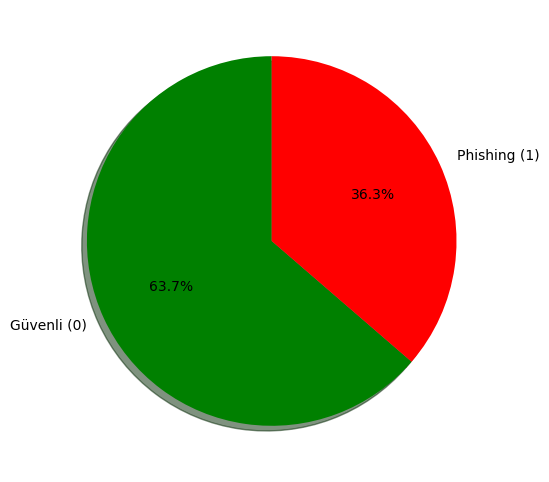

In [23]:
plt.figure(figsize=(6, 6))
plt.pie(phishing_counts, labels=['Güvenli (0)', 'Phishing (1)'], autopct='%1.1f%%', 
        colors=['green', 'red'], startangle=90, shadow=True)

In [24]:
corr_matrix=df.corr()

<Axes: >

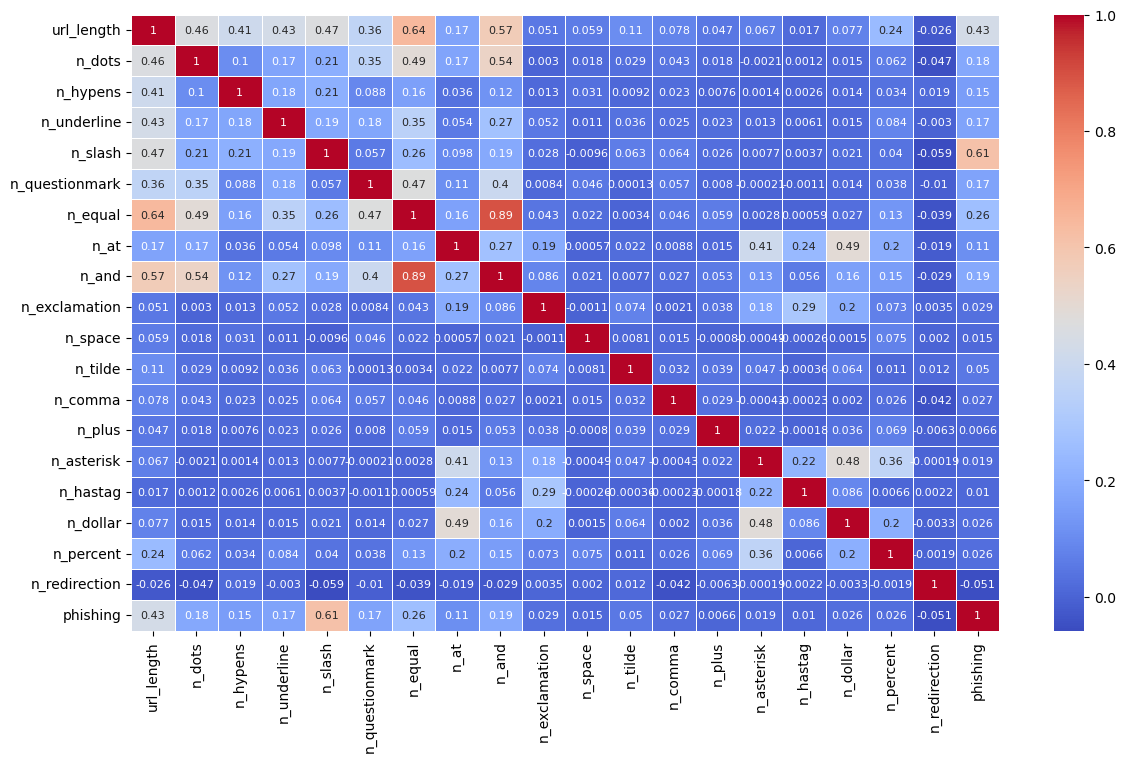

In [25]:
plt.figure(figsize=(14, 8))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", linewidths=0.5, annot_kws={"size": 8})

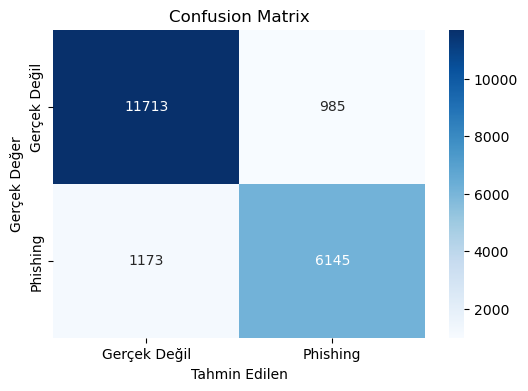

Model Doğruluk Oranı: 89.22%


In [51]:
from sklearn.metrics import confusion_matrix, accuracy_score



X = df.drop(columns=["phishing"])  # Özellikler
y = df["phishing"]  # Hedef değişken

# Veri setini eğitim ve test olarak ayırma
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Model oluşturma ve eğitme
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Tahminler
y_pred = model.predict(X_test)

# Confusion matrix hesaplama
cm = confusion_matrix(y_test, y_pred)

# Görselleştirme
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=["Gerçek Değil", "Phishing"], yticklabels=["Gerçek Değil", "Phishing"])
plt.xlabel("Tahmin Edilen")
plt.ylabel("Gerçek Değer")
plt.title("Confusion Matrix")
plt.show()

# Model doğruluğunu yazdırma
accuracy = accuracy_score(y_test, y_pred)
print(f"Model Doğruluk Oranı: {accuracy:.2%}")

In [26]:
x= df.drop('phishing', axis=1)

In [27]:
y= df['phishing']

In [28]:
x_train,x_test,y_train,y_test= train_test_split(x,y,test_size=0.2,random_state=42)

In [29]:
rf = RandomForestClassifier(n_estimators=100, random_state=42)

In [30]:
model=rf.fit(x_train,y_train)

In [31]:
model.score(x_test,y_test)

0.8921862509992007

In [32]:
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(x_train, y_train)
y_pred_rf = rf_model.predict(x_test)
accuracy_rf = accuracy_score(y_test, y_pred_rf)
print(f"Random Forest Doğruluk Skoru: {accuracy_rf:.4f}")

Random Forest Doğruluk Skoru: 0.8922


In [33]:
lr_model = LogisticRegression(max_iter=200)
lr_model.fit(x_train, y_train)
y_pred_lr = lr_model.predict(x_test)
accuracy_lr = accuracy_score(y_test, y_pred_lr)
print(f"Lojistik Regresyon Doğruluk Skoru: {accuracy_lr:.4f}")

Lojistik Regresyon Doğruluk Skoru: 0.8567


C:\Users\CASPER\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [34]:
knn_model = KNeighborsClassifier(n_neighbors=5)
knn_model.fit(x_train, y_train)
y_pred_knn = knn_model.predict(x_test)
accuracy_knn = accuracy_score(y_test, y_pred_knn)
print(f"KNN Doğruluk Skoru: {accuracy_knn:.4f}")

KNN Doğruluk Skoru: 0.8863


In [35]:
dt_model = DecisionTreeClassifier(random_state=42)
dt_model.fit(x_train, y_train)
y_pred_dt = dt_model.predict(x_test)
accuracy_dt = accuracy_score(y_test, y_pred_dt)
print(f"Karar Ağacı Doğruluk Skoru: {accuracy_dt:.4f}")

Karar Ağacı Doğruluk Skoru: 0.8830


In [37]:
svm_model = SVC(kernel='linear', random_state=42)
svm_model.fit(x_train, y_train)
y_pred_svm = svm_model.predict(x_test)
accuracy_svm = accuracy_score(y_test, y_pred_svm)
print(f"SVM Doğruluk Skoru: {accuracy_svm:.4f}")

SVM Doğruluk Skoru: 0.8577


In [38]:
nb_model = GaussianNB()
nb_model.fit(x_train, y_train)
y_pred_nb = nb_model.predict(x_test)
accuracy_nb = accuracy_score(y_test, y_pred_nb)
print(f"Naive Bayes Doğruluk Skoru: {accuracy_nb:.4f}")

Naive Bayes Doğruluk Skoru: 0.7156


In [39]:
gb_model = GradientBoostingClassifier(n_estimators=100, random_state=42)
gb_model.fit(x_train, y_train)
y_pred_gb = gb_model.predict(x_test)
accuracy_gb = accuracy_score(y_test, y_pred_gb)
print(f"Gradient Boosting Doğruluk Skoru: {accuracy_gb:.4f}")

Gradient Boosting Doğruluk Skoru: 0.8830


In [40]:
ab_model = AdaBoostClassifier(n_estimators=100, random_state=42)
ab_model.fit(x_train, y_train)
y_pred_ab = ab_model.predict(x_test)
accuracy_ab = accuracy_score(y_test, y_pred_ab)
print(f"AdaBoost Doğruluk Skoru: {accuracy_ab:.4f}")

C:\Users\CASPER\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


AdaBoost Doğruluk Skoru: 0.8754


In [42]:
results = pd.DataFrame({
    'Model': ['Logistic Regression', 'KNN', 'Decision Tree', 'Random Forest', 
              'SVM', 'Naive Bayes', 'Gradient Boosting', 'AdaBoost'],
    'Accuracy': [accuracy_lr, accuracy_knn, accuracy_dt, accuracy_rf, 
                 accuracy_svm, accuracy_nb, accuracy_gb, accuracy_ab]
})

# Sonuçları sıralama
results = results.sort_values(by='Accuracy', ascending=False)
print(results)

                 Model  Accuracy
3        Random Forest  0.892186
1                  KNN  0.886341
2        Decision Tree  0.883044
6    Gradient Boosting  0.882994
7             AdaBoost  0.875400
4                  SVM  0.857714
0  Logistic Regression  0.856715
5          Naive Bayes  0.715627


In [43]:
results = results.sort_values(by='Accuracy', ascending=False)
print(results)

                 Model  Accuracy
3        Random Forest  0.892186
1                  KNN  0.886341
2        Decision Tree  0.883044
6    Gradient Boosting  0.882994
7             AdaBoost  0.875400
4                  SVM  0.857714
0  Logistic Regression  0.856715
5          Naive Bayes  0.715627
